## Lets build a convolution neural network model

1) get data ready
2) preprocess the data(using ImageDataGenerator)
3) Create a model
4) Compile a model
5) Fit a model
6) Evaluate a model
7) save and use our custom data to see if our model is working or not

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kelixirr/pizza-steak-image-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 104M/104M [00:00<00:00, 147MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1


In [ ]:
# Inspect the data
!ls pizza_steak

test  train


In [11]:
# Lets see inside pizza_steaki
!ls pizza_steak/train

ls: cannot access 'pizza_steak/train': No such file or directory


In [ ]:
# Lets see the tets
!ls pizza_steak/test

pizza  steak


In [ ]:
# lets go more deep in the folder
! ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

# Woah we get all the images in th directory but lets find how many images are there in the directory


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# import os
import os
# walk through pizza-Steak directory and list the no. of images
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in 'pizza_steak'.
There are 2 directories and 0 image in 'pizza_steak/train'.
There are 0 directories and 750 image in 'pizza_steak/train/steak'.
There are 0 directories and 750 image in 'pizza_steak/train/pizza'.
There are 2 directories and 0 image in 'pizza_steak/test'.
There are 0 directories and 250 image in 'pizza_steak/test/steak'.
There are 0 directories and 250 image in 'pizza_steak/test/pizza'.


In [ ]:
# another way to find out how many images are in the file
no_of_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
no_of_steak_images_train

750

In [ ]:
# Get the class name(this is more helpful to get the list name of larger classes)
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_name=np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_name)

['pizza' 'steak']


In [ ]:
# Lets view the image

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  # set up target directory
  target_folder=target_dir + target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Read in a image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


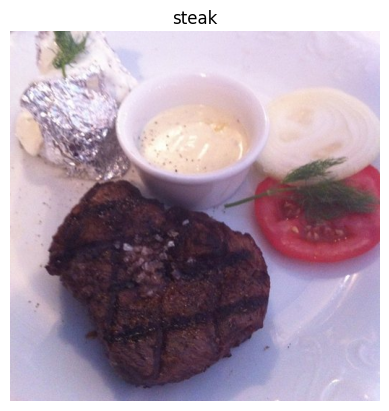

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img.shape

(512, 512, 3)

array([[[175, 163, 173],
        [180, 168, 178],
        [188, 176, 186],
        ...,
        [246, 238, 249],
        [246, 238, 249],
        [246, 238, 249]],

       [[186, 174, 184],
        [191, 179, 189],
        [199, 187, 197],
        ...,
        [247, 239, 250],
        [247, 239, 250],
        [247, 239, 250]],

       [[199, 187, 197],
        [205, 193, 203],
        [213, 201, 211],
        ...,
        [248, 240, 251],
        [248, 240, 251],
        [247, 239, 250]],

       ...,

       [[214, 195, 214],
        [214, 195, 214],
        [214, 195, 214],
        ...,
        [227, 227, 251],
        [225, 225, 249],
        [222, 222, 246]],

       [[214, 196, 212],
        [214, 196, 212],
        [215, 197, 213],
        ...,
        [226, 226, 250],
        [227, 227, 251],
        [227, 227, 251]],

       [[214, 196, 212],
        [215, 197, 213],
        [215, 197, 213],
        ...,
        [224, 224, 248],
        [227, 227, 251],
        [230, 230, 254]]], dtype=uint8)
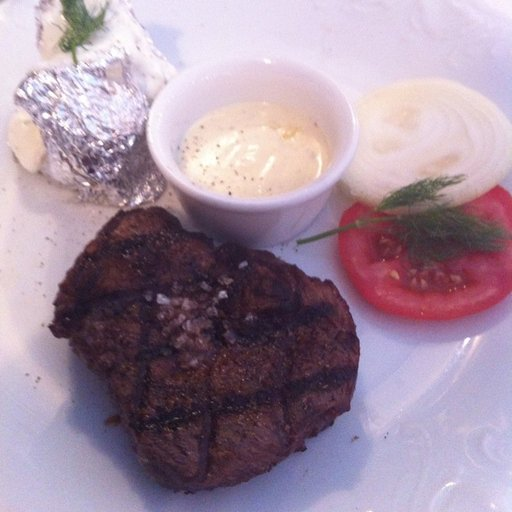

In [ ]:
img

In [ ]:
# Converting all the data between 0 to 1

img/255.

array([[[0.68627451, 0.63921569, 0.67843137],
        [0.70588235, 0.65882353, 0.69803922],
        [0.7372549 , 0.69019608, 0.72941176],
        ...,
        [0.96470588, 0.93333333, 0.97647059],
        [0.96470588, 0.93333333, 0.97647059],
        [0.96470588, 0.93333333, 0.97647059]],

       [[0.72941176, 0.68235294, 0.72156863],
        [0.74901961, 0.70196078, 0.74117647],
        [0.78039216, 0.73333333, 0.77254902],
        ...,
        [0.96862745, 0.9372549 , 0.98039216],
        [0.96862745, 0.9372549 , 0.98039216],
        [0.96862745, 0.9372549 , 0.98039216]],

       [[0.78039216, 0.73333333, 0.77254902],
        [0.80392157, 0.75686275, 0.79607843],
        [0.83529412, 0.78823529, 0.82745098],
        ...,
        [0.97254902, 0.94117647, 0.98431373],
        [0.97254902, 0.94117647, 0.98431373],
        [0.96862745, 0.9372549 , 0.98039216]],

       ...,

       [[0.83921569, 0.76470588, 0.83921569],
        [0.83921569, 0.76470588, 0.83921569],
        [0.83921569, 0

##  **now lets build our cnn model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set random_seed
tf.random.set_seed(42)

# Preprocess data(get all the pixel values between 0 and 1)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#set up train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

# Import data from directories and covert them into batches

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Create a CNN Model

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")])

# Compile a modell
model.compile(loss=tf.keras.losses.BinaryCrossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit a model

history=model.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.6403 - loss: 0.6232 - val_accuracy: 0.7640 - val_loss: 0.4722
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7639 - loss: 0.4888 - val_accuracy: 0.8360 - val_loss: 0.3882
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8051 - loss: 0.4223 - val_accuracy: 0.7640 - val_loss: 0.4880
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8250 - loss: 0.4300 - val_accuracy: 0.7840 - val_loss: 0.4491
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8316 - loss: 0.3934 - val_accuracy: 0.8320 - val_loss: 0.3618


** Lets Break Down our model And lets create a same model**

In [ ]:
#we already have the data so we will not download it again but for practice we can do it
import zipfile
# zip_ref=zipflie.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


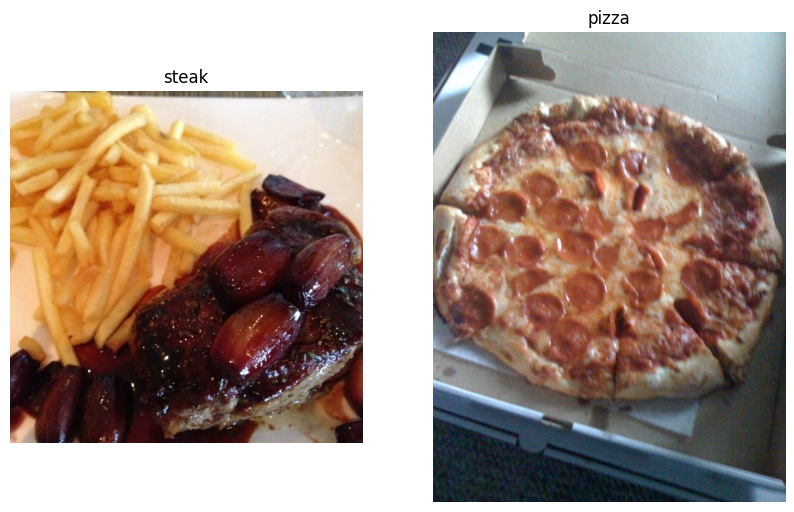

In [ ]:
# 8lets visualize the data
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


In [ ]:
# Preprocess the data
# defining train and test directory

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


In [ ]:
# lets use imagedata genrator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
# Lets cretae a directory
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Now our data is ready lets import some import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [ ]:
# NOw lets build our mode
model_1=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3),name="conv_1"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    tf.keras.layers.Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile a model
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# FIt a modle
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.6835 - loss: 0.5958 - val_accuracy: 0.7980 - val_loss: 0.4505
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7628 - loss: 0.4774 - val_accuracy: 0.7640 - val_loss: 0.4694
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8078 - loss: 0.4214 - val_accuracy: 0.8520 - val_loss: 0.3505
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8625 - loss: 0.3353 - val_accuracy: 0.8400 - val_loss: 0.3441
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8778 - loss: 0.3083 - val_accuracy: 0.8620 - val_loss: 0.3274


<Axes: >

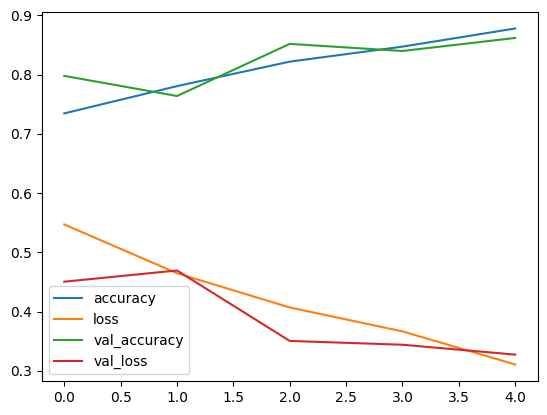

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
## PLot the Validation and Training Data Separately
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

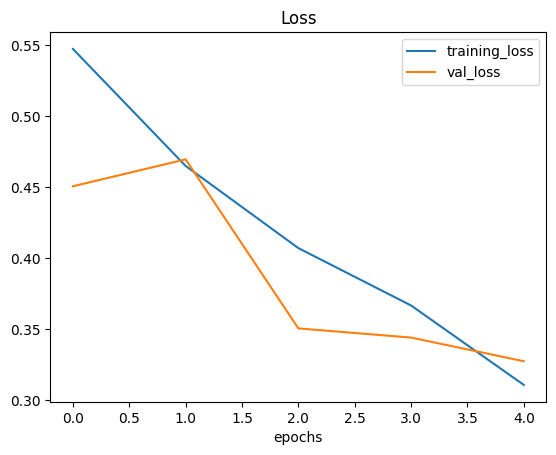

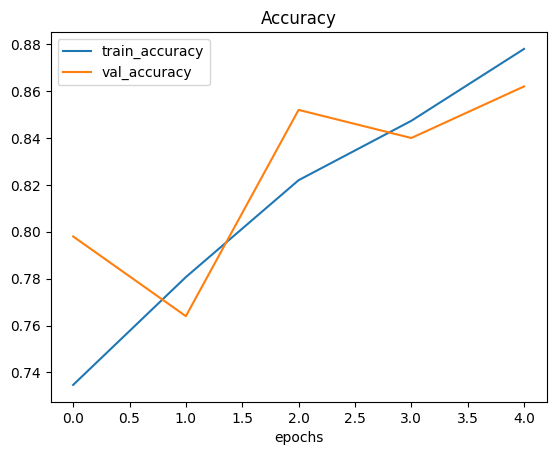

In [ ]:
plot_loss_curves(history_1)


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
# Lets Create a model using different kayers
tf.random.set_seed(42)

# Create a model
model_2=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile amodel
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# FIt a model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5791 - loss: 0.6699 - val_accuracy: 0.7820 - val_loss: 0.4770
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7927 - loss: 0.4829 - val_accuracy: 0.8440 - val_loss: 0.3920
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7962 - loss: 0.4446 - val_accuracy: 0.8480 - val_loss: 0.3480
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8076 - loss: 0.4063 - val_accuracy: 0.8560 - val_loss: 0.3369
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8316 - loss: 0.3852 - val_accuracy: 0.8360 - val_loss: 0.3604


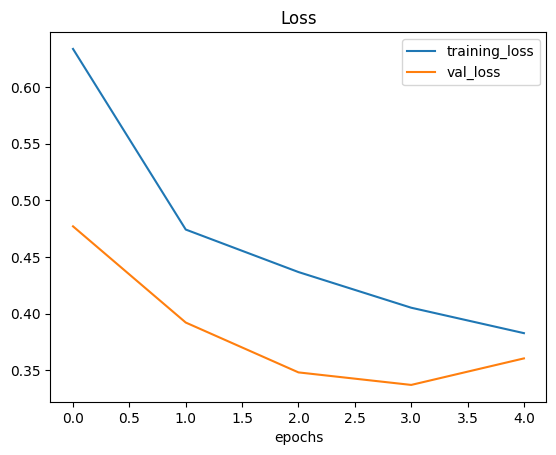

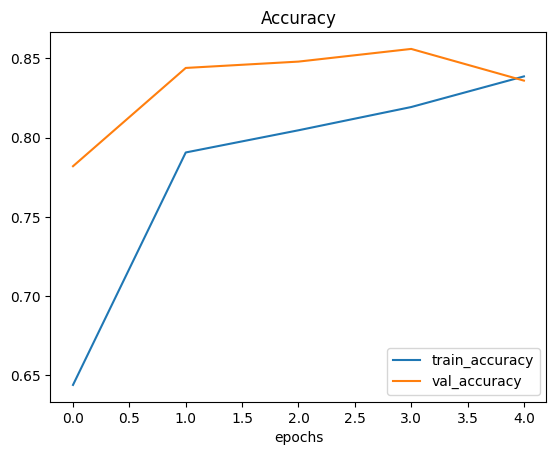

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         5,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,315 (102.80 KB)

 Trainable params: 8,771 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,544 (68.54 KB)

# Now lets do some Data Augmention
**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [ ]:
# Lets create ImageDataGenerator training instance with data augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                           )

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Now let imprt data and augment it using training directory

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 batch_size=32,
                                                                 target_size=(224,224),
                                                                 class_mode="binary",
                                                                 seed=42)

#lets import data from directory which are non augmented
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                             seed=42)
test_data=test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                             seed=42)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

In [ ]:
# lets create a model using the data augmented
tf.random.set_seed(42)

# Create a model
model_4=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(1,activation="sigmoid")])

# compile a model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# FIt a model
history_4=model_4.fit(train_data_augmented,
                      epochs=10,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.6003 - loss: 0.6642 - val_accuracy: 0.8120 - val_loss: 0.4473
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.7541 - loss: 0.5239 - val_accuracy: 0.8120 - val_loss: 0.3987
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.7650 - loss: 0.5099 - val_accuracy: 0.8320 - val_loss: 0.3816
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.7733 - loss: 0.4578 - val_accuracy: 0.8460 - val_loss: 0.3729
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.8021 - loss: 0.4367 - val_accuracy: 0.8580 - val_loss: 0.3408
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - accuracy: 0.7980 - loss: 0.4419 - val_accuracy: 0.8740 - val_loss: 0.3129
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 471ms/step - accuracy: 0.8164 - loss: 0.4197 - val_accuracy: 0.8700 - val_loss: 0.3406
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 479ms/step - accuracy: 0.8241 - loss: 0.4098 - val_accu

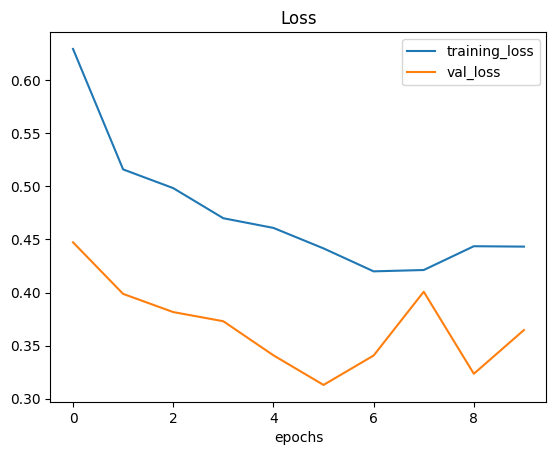

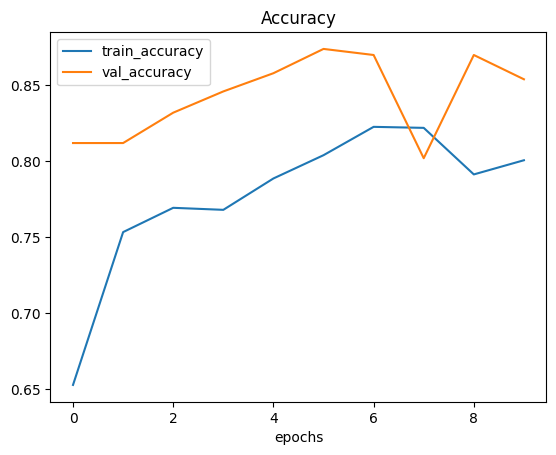

In [ ]:
plot_loss_curves(history_4);

In [ ]:
# Lets shuffled the data and see the output
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                       batch_size=32,
                                                                       target_size=(224,224),
                                                                       class_mode="binary",
                                                                       shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
# Lets create a model and fit the shuffle data and lets see if there is any improvement or not
tf.random.set_seed(42)

#create_model
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(1,activation="sigmoid")
])

#compile amodel
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_6.fit(train_data_augmented_shuffled,
            epochs=10,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,

            validation_steps=len(test_data))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 560ms/step - accuracy: 0.5634 - loss: 0.6622 - val_accuracy: 0.7620 - val_loss: 0.5196
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 516ms/step - accuracy: 0.7253 - loss: 0.5640 - val_accuracy: 0.7980 - val_loss: 0.4526
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - accuracy: 0.7458 - loss: 0.5110 - val_accuracy: 0.8260 - val_loss: 0.3964
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 471ms/step - accuracy: 0.7764 - loss: 0.4868 - val_accuracy: 0.8300 - val_loss: 0.3752
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.7765 - loss: 0.4624 - val_accuracy: 0.8280 - val_loss: 0.3873
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.7764 - loss: 0.4723 - val_accuracy: 0.8560 - val_loss: 0.3631
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 822ms/step - accuracy: 0.7913 - loss: 0.4512 - val_accuracy: 0.8580 - val_loss: 0.3192
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 508ms/step - accuracy: 0.7975 - loss: 0.4429 - val_accu

## Now lets make Prediction with our train model


In [ ]:
# lets import any image from server
print(class_name)

['pizza' 'steak']


--2025-10-10 14:35:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2025-10-10 14:35:45 (212 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

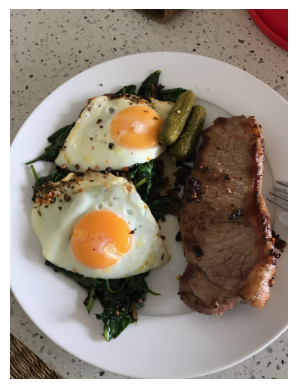

In [ ]:
# View our wxample image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

## Since our MOdel takes input image shape as 224,224 and color channle as 3 so let create a function so we can always reshape the give image into the image which our model can predict on

In [ ]:
def load_and_prep(filename,img_shape=224):

  # read in target file
  img=tf.io.read_file(filename)

  # Decode a read file and convert it into a tensor of color channel 3
  img=tf.image.decode_image(img)

  # resize the decoded image
  img=tf.image.resize(img,size=[img_shape,img_shape])

  #rescale a img
  img=img/255.
  return img



In [ ]:
# Load in and preprocess our custom image
steak=load_and_prep("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Now lets see our model can predict the class using our image
model_6.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

## Getting error
 as we try to build our model in shape of (batch_size,shape,color channel) we need to add one extra dimension to it to work


In [ ]:
# Now lets see if by adding an extra dim we can predict ourel
model_6.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step


array([[0.8166281]], dtype=float32)

In [ ]:
# Lets just create a function to predict and plot the image
def pred_and_plot(model,filename,classname):

  #import a target image and preprocess it
  img=load_and_prep(filename)

  #make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  #Get the Predict class
  pred_class=class_name[int(tf.round(pred)[0][0])]

  # plot thr image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


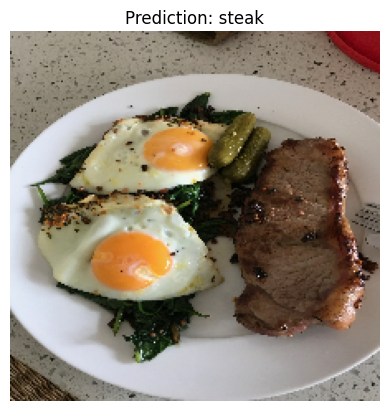

In [ ]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg", class_name)

/content/pizza_test: Scheme missing.


(np.float64(-0.5), np.float64(203.5), np.float64(191.5), np.float64(-0.5))

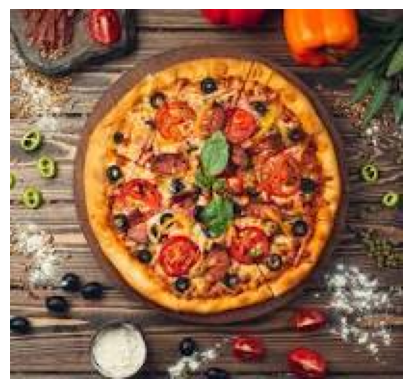

In [ ]:
# lets see if it will work on our custom image which is in our pc

!wget "/content/pizza_test"
pizza=mpimg.imread("pizza_test")
plt.imshow(pizza)
plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


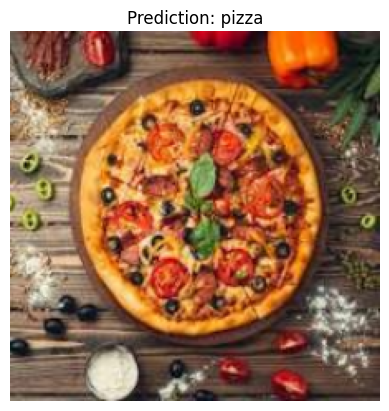

In [ ]:
# Now let just predict it
pred_and_plot(model_6,"pizza_test",class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


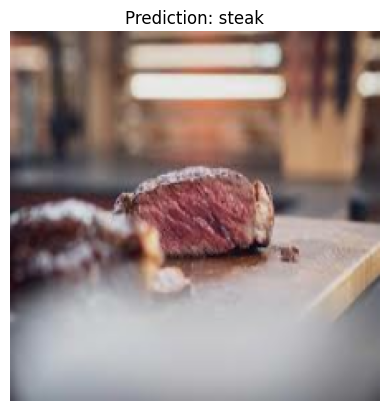

In [ ]:
# Now let just predict it using our model
pred_and_plot(model_6,"/content/setak_1.jpeg",class_name)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


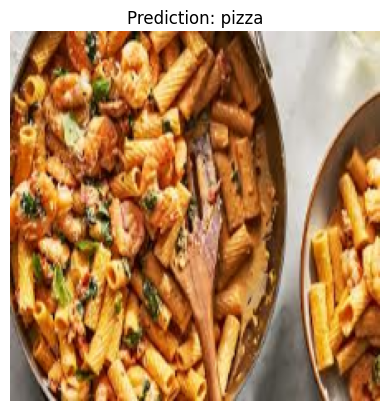

In [ ]:
# lets try to predict on wrong image
pred_and_plot(model_6,"/content/experi_1.jpeg",class_name)

## Lets jjust now move toward the muti-class_Classification:
all the process will be the same only the classes will increase

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-10-10 15:15:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  22.4MB/s    in 23s     

2025-10-10 15:16:03 (21.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Lets walk to all the directories
for dirpath,dirnames,filename in os.walk("10_food_classes_all_data"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 250 images in '10_food_classes_all_data'.
There are 10 directories and 250 images in '10_food_classes_all_data/train'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/chicken_cur

In [ ]:
# Now lets just setup the train and test directory

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"


In [ ]:
# Now let just get the classes name from sub-directory
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (341, 512, 3)


(np.float64(-0.5), np.float64(511.5), np.float64(340.5), np.float64(-0.5))

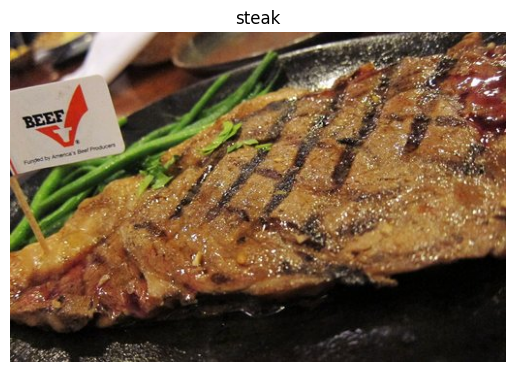

In [ ]:
# View a random image from training data set
import random

img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

plt.imshow(img)
plt.axis(False)

In [ ]:
# Now just preprocess our data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Now lets just load data from directories and convert them into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="categorical",
                                           seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Now let just build a model

# set a random seed
tf.random.set_seed(42)

# Create a model
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(10,activation="softmax")
])

# Compile a model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit a model
Hsitory_7=model_7.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 115ms/step - accuracy: 0.1640 - loss: 2.2306 - val_accuracy: 0.2928 - val_loss: 2.0012
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.3304 - loss: 1.9369 - val_accuracy: 0.2992 - val_loss: 1.9761
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.3868 - loss: 1.7682 - val_accuracy: 0.3436 - val_loss: 1.9214
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.4629 - loss: 1.6050 - val_accuracy: 0.3556 - val_loss: 1.8980
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4954 - loss: 1.4769 - val_accuracy: 0.3320 - val_loss: 1.9936


In [ ]:
model_7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        57,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,862 (710.40 KB)

 Trainable params: 60,620 (236.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 121,242 (473.61 KB)

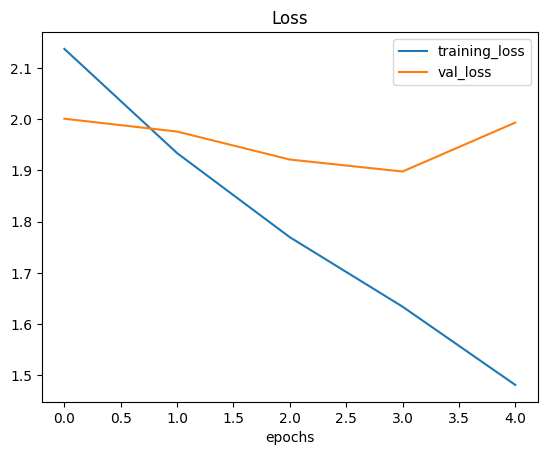

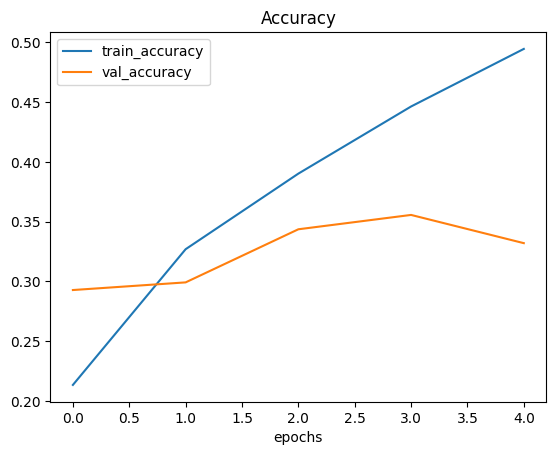

In [ ]:
# plot loss curve
plot_loss_curves(Hsitory_7)

## We got really poor results lets just try tro improve our model just by adding some more layers into it :     
   I think first we should make our prediction to cross 70% so after that we can improve our model using some data augmentation
   

In [ ]:
# set a randoom_seed
tf.random.set_seed(42)

# Create a model
model_8= Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(10,activation="softmax")
])

# Compile a model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# fit the model
history_8=model_8.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.1403 - loss: 2.2606 - val_accuracy: 0.2700 - val_loss: 2.0484
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.3128 - loss: 1.9596 - val_accuracy: 0.2992 - val_loss: 1.9645
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.3938 - loss: 1.7659 - val_accuracy: 0.3280 - val_loss: 1.9203
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4908 - loss: 1.5141 - val_accuracy: 0.3520 - val_loss: 1.9034
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.5908 - loss: 1.2450 - val_accuracy: 0.3436 - val_loss: 2.0985
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.7001 - loss: 0.9192 - val_accuracy: 0.3136 - val_loss: 2.4839
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.7830 - loss: 0.6713 - val_accuracy: 0.2960 - val_loss: 2.9518
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.8550 - loss: 0

In [ ]:
model_8.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        57,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,592 (721.07 KB)

 Trainable params: 61,530 (240.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,062 (480.71 KB)

## Again its a poor results let see if we can do something by data augmentation:
lets give a try

In [ ]:
# augment the dtaa
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.2)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 batch_size=32,
                                                                 target_size=(224,224),
                                                                 class_mode="categorical",
                                                                 seed=42)

Found 7500 images belonging to 10 classes.


In [ ]:
# Lets try this data on our  model 8
model_9=tf.keras.models.clone_model(model_8)

# compile a model
model_9.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
# Fit a model
history_9=model_9.fit(train_data_augmented,
                      epochs=50,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 439ms/step - accuracy: 0.1069 - loss: 2.3005 - val_accuracy: 0.2044 - val_loss: 2.1526
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 423ms/step - accuracy: 0.1939 - loss: 2.1846 - val_accuracy: 0.2364 - val_loss: 2.0851
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 423ms/step - accuracy: 0.2361 - loss: 2.1240 - val_accuracy: 0.2632 - val_loss: 2.0391
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 426ms/step - accuracy: 0.2325 - loss: 2.1129 - val_accuracy: 0.3028 - val_loss: 1.9827
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 457ms/step - accuracy: 0.2653 - loss: 2.0547 - val_accuracy: 0.3484 - val_loss: 1.8700
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 432ms/step - accuracy: 0.3013 - loss: 1.9884 - val_accuracy: 0.3292 - val_loss: 1.8958
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 430ms/step - accuracy: 0.3012 - loss: 1.9785 - val_accuracy: 0.3728 - val_loss: 1.8151
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 449ms/step - accuracy: 0.3206 - l

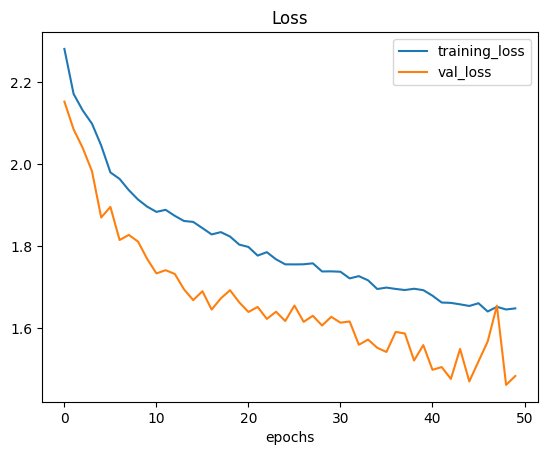

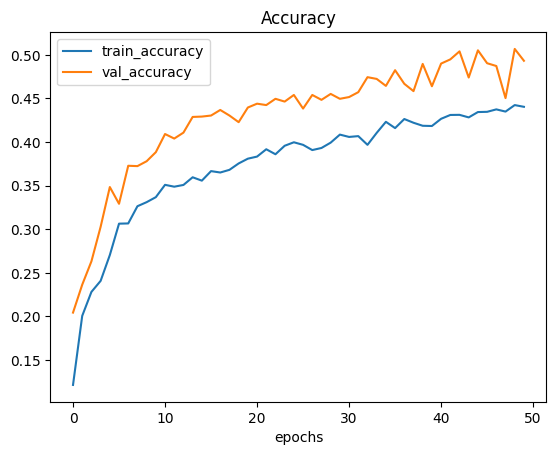

In [ ]:
plot_loss_curves(history_9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


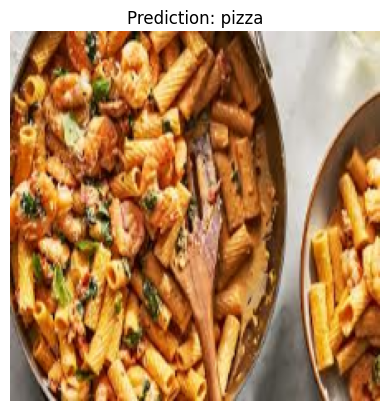

In [ ]:
pred_and_plot(model_9,"/content/experi_1.jpeg",class_names)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


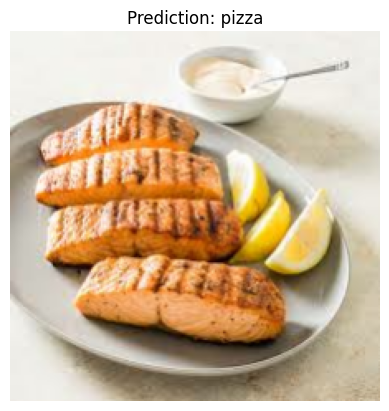

In [ ]:
pred_and_plot(model_9,"/content/salmon.jpeg",class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


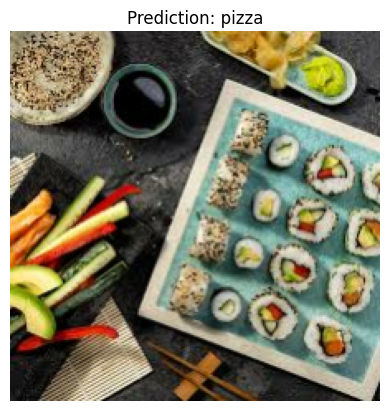

In [ ]:
pred_and_plot(model_9,"/content/sushi.jpeg",class_names)